In [9]:
from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

In [10]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets
import control as c
import sympy as sym
from IPython.display import Latex, display, Markdown # For displaying Markdown and LaTeX code
from fractions import Fraction
import matplotlib.patches as patches

## First-order systems with no zeros

### Introduction

First-order systems without zeros are characterized by the following transfer function:

\begin{equation}
    G(s)=\frac{k}{s+k}.
\end{equation}

The $k$ value is important since it defines the following parameters:
- $1/k$ denotes the *time constant* of the response, which defines the time needed for the step response to reach $\approx$ 63% of its final value.
- $t_r$ denotes the *rise time*, i.e. the time needed for the system response to go from 10\% to 90\% of the steady state value.
- $t_s$ denotes the *settling time*, i.e. the time at which the system response is outside the error band (e.g. 2\% as set in the example below) for the last time.

The step response of these systems is given by:

\begin{equation}
    c(t)=1-e^{-at},
\end{equation}

where the forced response is equal to $1$ and natural response to $-e^{-at}$.

---

### How to use this notebook?

Move the slider to define the $k$ value in the transfer function of the first-order system - $G(s)=\frac{k}{s+k}$ and observe the unit step time response of the defined system.

<IPython.core.display.Javascript object>


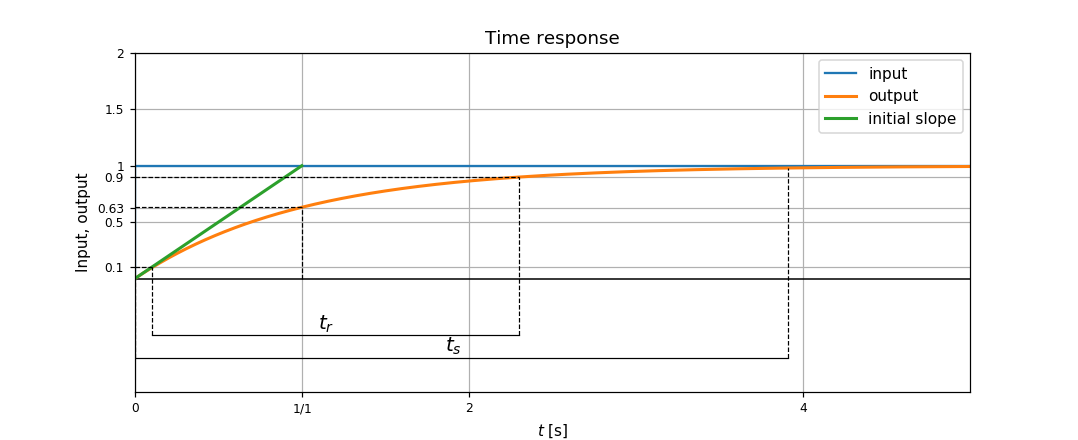

interactive(children=(IntSlider(value=1, description='k', max=5, min=1), Output()), _dom_classes=('widget-inte…

In [11]:
# set up plot
fig, ax = plt.subplots(figsize=[9.8,4],num='First-order system')
ax.set_ylim([-1, 2])
ax.set_xlim([0, 5])
ax.grid(True)
ax.set_title ('Time response')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('Input, output')
xaxis = ax.axhline(y=0,color='k',lw=1)

response, = ax.plot([], [])
slope, = ax.plot([], [])
x1a, = ax.plot([], [])
y1a, = ax.plot([], [])
tr11, = ax.plot([], [])
trv1, = ax.plot([], [])
trv2, = ax.plot([], [])
trh1, = ax.plot([], [])
trh2, = ax.plot([], [])
ts11, = ax.plot([], [])
ts1, = ax.plot([], [])
ts2, = ax.plot([], [])
texttr=ax.text(0,0,'')
textts=ax.text(0,0,'')

ax.step([0,5],[0,1],color='C0',label='input')

# generate x values
t = np.linspace(0, 2 * np.pi, 10000)
  
def response_func(t, k):
    """"Return response function"""
    return 1-np.exp(-k*t)

@widgets.interact(k=(1, 5, 1))


def update(k=1):
    """Remove old lines from plot and plot new one"""
    global response,slope,x1a,y1a,tr11,trv1,trv2,trh1,trh2,ts11,ts1,ts2,texttr,textts
    ax.lines.remove(response)
    ax.lines.remove(slope)
    ax.lines.remove(x1a)
    ax.lines.remove(y1a)
    ax.lines.remove(tr11)
    ax.lines.remove(trv1)
    ax.lines.remove(trv2)
    ax.lines.remove(trh1)
    ax.lines.remove(trh2)
    ax.lines.remove(ts11)
    ax.lines.remove(ts1)
    ax.lines.remove(ts2)
    texttr.remove()
    textts.remove()
    response, = ax.plot(t, response_func(t,k), color='C1',lw=2)
    response.set_label('output')
    slope, = ax.plot([0,1/k], [0,1], color='C2',lw=2)
    slope.set_label('initial slope')
    x1a, = ax.plot([1/k,1/k],[0,1-np.exp(-1)],'--',color='k',lw=.8)
    y1a, = ax.plot([0,1/k],[1-np.exp(-1),1-np.exp(-1)],'--',color='k',lw=.8)
# rise time
    tr11, = ax.plot([-np.log(0.9)/k,-np.log(0.1)/k],[-0.5,-0.5],color='k',lw=.8)
    trv1, = ax.plot([-np.log(0.9)/k,-np.log(0.9)/k],[-0.5,0.1],'--',color='k',lw=.8)
    trv2, = ax.plot([-np.log(0.1)/k,-np.log(0.1)/k],[-0.5,0.9],'--',color='k',lw=.8)
    trh1, = ax.plot([0,-np.log(0.9)/k],[0.1,0.1],'--',color='k',lw=.8)
    trh2, = ax.plot([0,-np.log(0.1)/k],[0.9,0.9],'--',color='k',lw=.8)
# settling time
    ts11, = ax.plot([0,-np.log(0.02)/k],[-0.7,-0.7],color='k',lw=.8)
    ts1, = ax.plot([0,0],[-0.7,0],'--',color='k',lw=.8)
    ts2, = ax.plot([-np.log(0.02)/k,-np.log(0.02)/k],[-0.7,0.98],'--',color='k',lw=.8)
    ax.legend()
    texttr=ax.text((-np.log(0.1)/k-(-np.log(0.9)/k))/2,-0.45, '$t_r$',fontsize=13)
    textts=ax.text((-np.log(0.02)/k)/2-0.1,-0.65, '$t_s$',fontsize=13)

    plt.xticks([0,1/k,2,4], [0,'${1}/{%s}$'%k,2,4],fontsize=8)
    plt.yticks([0.1,0.5,0.63,0.9,1,1.5,2], [0.1,0.5,0.63,0.9,1,1.5,2],fontsize=8)
    
    num1=[k]
    den1=[1,k]
    display(Markdown('Transfer function of the system $G(s)$ is equal to:'))
    tf_sys1=c.TransferFunction(num1,den1)
    s=sym.Symbol('s')
    eq=(k/(s+k))
    display(eq)

## Second-order systems

### Introduction

In contrast to the first-order systems presented above, in which the parameter $k$ only affected the speed of the response, changes of the analogue parameters in the second order systems may affect the actual form of the response. The following four responses are possible in these systems:
- *overdamped* response,
- *underdamped* response,
- *undapmed* response, and
- *critically damped* response.

### How to use this notebook?

Move the slider to define the values of $a$ and $b$ in the transfer function of the second-order system of the form $G(s)=\frac{b}{s^2+as+b}$ and observe the pole-zero plot and the unit step time response of the defined system.

<IPython.core.display.Javascript object>


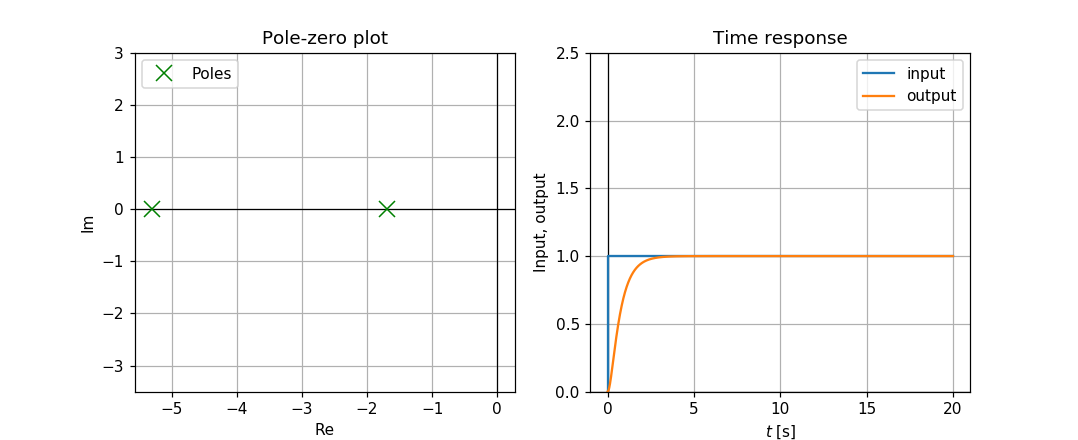

interactive(children=(IntSlider(value=7, description='a', max=10), IntSlider(value=9, description='b', max=10,…

In [12]:
# set up plot
fig1, ax1 = plt.subplots(1,2,figsize=[9.8,4],num='Second-order system')
ax1[0].set_ylim([-3.5, 3])
ax1[1].set_ylim([0, 2.5])
# ax1.set_xlim([0, 5])
ax1[0].grid(True)
ax1[1].grid(True)
ax1[0].axhline(y=0,color='k',lw=.8)
ax1[1].axhline(y=0,color='k',lw=.8)
ax1[0].axvline(x=0,color='k',lw=.8)
ax1[1].axvline(x=0,color='k',lw=.8)
ax1[0].set_xlabel('Re')
ax1[0].set_ylabel('Im')
ax1[1].set_xlabel('$t$ [s]')
ax1[1].set_ylabel('Input, output')
ax1[0].set_title('Pole-zero plot')
ax1[1].set_title('Time response')

t = np.linspace(0, 20, 10000)

textGs = ax1[0].text(0,0,'')

ax1[1].step([0,20],[0,1],color='C0',label='input')

plotzero, = ax1[0].plot([], [])
response2, = ax1[1].plot([], [])

def response_func2(t, a, b):
    num_sys=np.array([b])
    den_sys=np.array([1,a,b])
    tf_sys=c.TransferFunction(num_sys,den_sys)
    poles_sys,zeros_sys=c.pzmap(tf_sys, Plot=False)
    T, yout = c.step_response(tf_sys,t)
    return T, yout, poles_sys, tf_sys
 
@widgets.interact(a=(0, 10, 1),b=(1,10,1))

def update(a=7,b=9):
    """ Update plots """
    global response2, plotzero, textGs
    ax1[0].lines.remove(plotzero)
    ax1[1].lines.remove(response2)
#     textGs.remove()
    T, yout, poles_sys, tf_sys = response_func2(t, a, b)
    plotzero, = ax1[0].plot(np.real(poles_sys), np.imag(poles_sys), 'xg', markersize=10, label = 'Poles')
#     textGs = ax1[0].text(-7,1,tf_sys)
    response2, = ax1[1].plot(T,yout,color='C1',label='output')
    s=sym.Symbol('s')
    eq=b/(s**2+a*s+b)
    coeff = [1,a,b]
    rootsdenom=np.roots(coeff)
    eq2=b/((s-rootsdenom[0])*(s-rootsdenom[1]))
    display(Markdown('Transfer function of the system $G(s)$ is equal to:'))
    display(eq),display(Markdown('or')),display(eq2)

    if np.imag(poles_sys)[0] == 0 and np.imag(poles_sys)[1] == 0 and np.real(poles_sys)[0] < 0 and np.real(poles_sys)[1] < 0 and np.real(poles_sys)[0]!=np.real(poles_sys)[1]:
        display(Markdown('The system is **overdamped**, because both poles have only negative real parts.'))
    elif math.isclose(0, np.imag(poles_sys)[0], abs_tol=10**-6) and math.isclose(0, np.imag(poles_sys)[1], abs_tol=10**-6) and np.real(poles_sys)[1] < 0 and np.real(poles_sys)[0]==np.real(poles_sys)[1]:
        display(Markdown('The system is **critically damped** beacuse there is a double pole with negative real part only.'))
    elif np.real(poles_sys)[0] == 0 and np.real(poles_sys)[1] == 0:
        display(Markdown('The system is **undamped**, because the poles have only imaginary parts.'))
    elif np.imag(poles_sys)[0] != 0 and np.imag(poles_sys)[1] != 0 and np.real(poles_sys)[0] != 0 and np.real(poles_sys)[1] != 0:
        display(Markdown('The system is **underdamped** beacuse both poles have negative real and non-zero complex part.'))
    ax1[0].legend()
    ax1[1].legend()